## Credit Card Transaction DQR

In [1]:
# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
from datetime import timedelta

Load in the data.

In [2]:
%%time
mydata = pd.read_csv('card transactions.csv')

CPU times: user 158 ms, sys: 49.5 ms, total: 207 ms
Wall time: 234 ms


Drop some weird columns that we picked up during loading.

In [12]:
mydata.drop(['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],axis=1, inplace=True)

In [14]:
mydata

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


Dimensions of the Data.

In [13]:
mydata.shape

(96753, 10)

In [15]:
numrecords = len(mydata)
print(numrecords)

96753


In [16]:
%%time
import pandas_profiling
mydata.profile_report(correlations={"cramers": {"calculate": False}})
profile = pandas_profiling.ProfileReport(mydata)
profile.to_file('card_transactions_stats.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 16 s, sys: 5.54 s, total: 21.6 s
Wall time: 18.7 s


In [17]:
mydata.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [113]:
mydata['Date']= pd.to_datetime(mydata['Date'])

In [114]:
mydata.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

### Recnum
Record Number. The chronological order of the transaction. Because there is no time field, we are using record number to determine the order in which transactions occurred on the same day. For example, recordnum 6 comes before recordnum 8.

Number of records.

In [19]:
mydata['Recnum'].count()

96753

Percent Populated.

In [20]:
mydata['Recnum'].count() * 100 / numrecords

100.0

Unique Values

In [21]:
len(mydata['Recnum'].unique())

96753

Most common field.

In [22]:
mydata['Recnum'].value_counts()

2049     1
21856    1
7529     1
5480     1
28007    1
        ..
31386    1
25241    1
27288    1
4759     1
2047     1
Name: Recnum, Length: 96753, dtype: int64

### Cardnum
Card Number. The number of the card credit used in the transaction.

Number of records.

In [23]:
mydata['Cardnum'].count()

96753

Percent Populated.

In [24]:
mydata['Cardnum'].count() * 100 / numrecords

100.0

Unique Values

In [25]:
len(mydata['Cardnum'].unique())

1645

Most common field.

In [26]:
mydata['Cardnum'].value_counts()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
              ... 
5142110002       1
5142306704       1
5142296479       1
5142246010       1
5142175806       1
Name: Cardnum, Length: 1645, dtype: int64

[Text(0, 0, '5142148452'),
 Text(1, 0, '5142184598'),
 Text(2, 0, '5142189108'),
 Text(3, 0, '5142297710'),
 Text(4, 0, '5142223373'),
 Text(5, 0, '5142187452'),
 Text(6, 0, '5142299634'),
 Text(7, 0, '5142189945'),
 Text(8, 0, '5142149691'),
 Text(9, 0, '5142190147'),
 Text(10, 0, '5142230181'),
 Text(11, 0, '5142157720'),
 Text(12, 0, '5142152067'),
 Text(13, 0, '5142143744'),
 Text(14, 0, '5142125684'),
 Text(15, 0, '5142259479'),
 Text(16, 0, '5142273878'),
 Text(17, 0, '5142176897'),
 Text(18, 0, '5142132941'),
 Text(19, 0, '5142131548')]

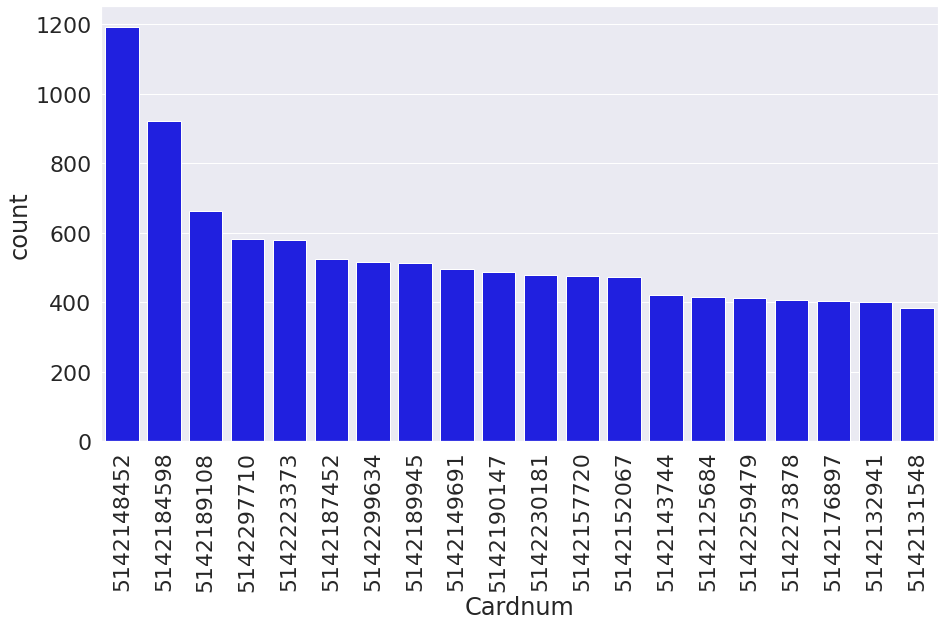

In [82]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Cardnum', data = mydata, color="blue", order =mydata['Cardnum'].value_counts().head(20).index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_yscale('log')

### Date
Date of the transaction.

Number of records.

In [27]:
mydata['Date'].count()

96753

Percent Populated.

In [28]:
mydata['Date'].count() * 100 / numrecords

100.0

Unique Values

In [29]:
len(mydata['Date'].unique())

365

Most common field.

In [30]:
mydata['Date'].value_counts()

2/28/10     684
8/10/10     610
3/15/10     594
9/13/10     564
9/7/10      536
           ... 
11/7/10      11
10/3/10      10
1/16/10       9
10/17/10      6
12/26/10      6
Name: Date, Length: 365, dtype: int64

<AxesSubplot:title={'center':'Weekly Transactions'}, xlabel='Date'>

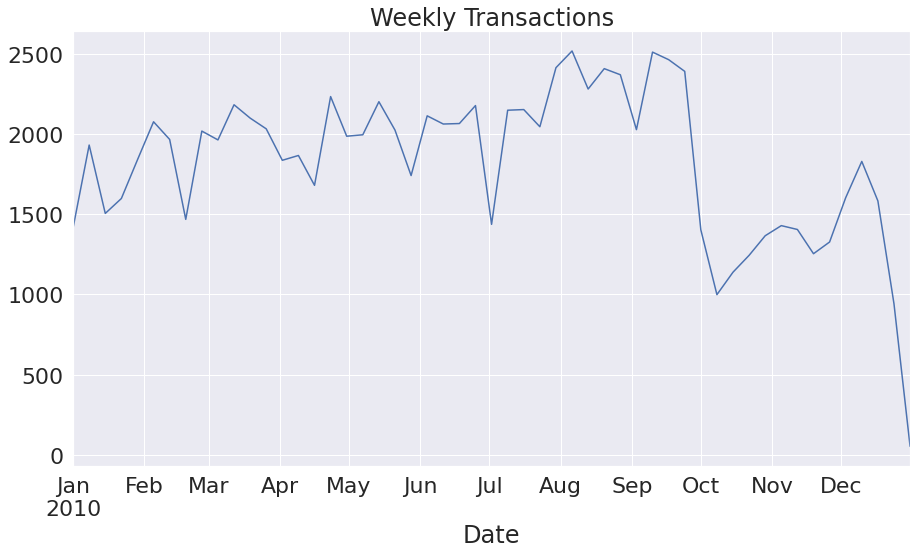

In [115]:
mydata.assign(trx=np.ones(numrecords)).set_index(mydata['Date']).resample(timedelta(days=7)).count().trx.plot(title='Weekly Transactions')

Text(0.5, 1.0, 'Sum of Transactions Throughout the Year')

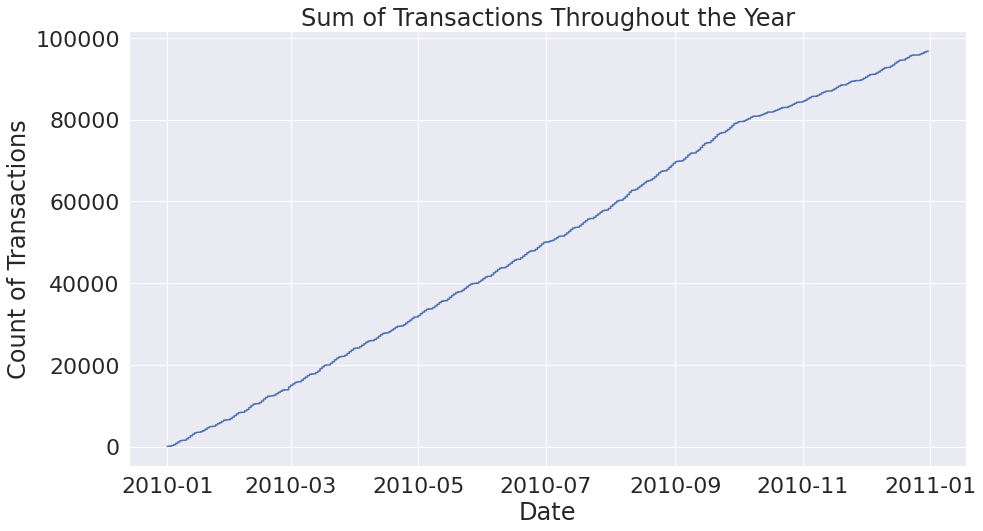

In [143]:
plt.plot(mydata['Date'], mydata['Recnum'])
plt.ylabel('Count of Transactions')
plt.xlabel('Date')
plt.title('Sum of Transactions Throughout the Year')

### Merchnum
Merchant Number. Unique identifier for a merchant.

Number of records.

In [31]:
mydata['Merchnum'].count()

93378

Percent Populated.

In [32]:
mydata['Merchnum'].count() * 100 / numrecords

96.51173607019938

Unique Values

In [33]:
len(mydata['Merchnum'].unique())

13092

Most common field.

In [34]:
mydata['Merchnum'].value_counts()

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
                 ... 
6859858565859       1
6691478             1
6000321809          1
677046188337        1
9503600002900       1
Name: Merchnum, Length: 13091, dtype: int64

[Text(0, 0.5, 'Log Scale of Count')]

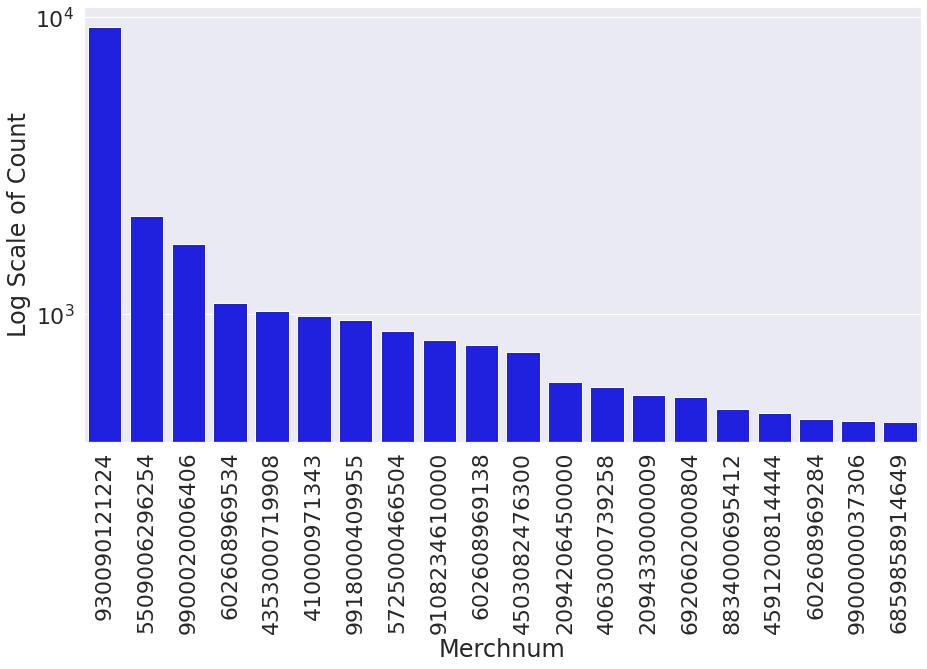

In [85]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Merchnum', data = mydata, color="blue", order =mydata['Merchnum'].value_counts().head(20).index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_yscale('log')
plot.set(ylabel='Log Scale of Count')

### Merch description
Text description of the merchant.

Number of records.

In [35]:
mydata['Merch description'].count()

96753

Percent Populated.

In [36]:
mydata['Merch description'].count() * 100 / numrecords

100.0

Unique Values

In [37]:
len(mydata['Merch description'].unique())

13126

Most common field.

In [38]:
mydata['Merch description'].value_counts()

GSA-FSS-ADV               1688
SIGMA-ALDRICH             1635
STAPLES #941              1174
FISHER SCI ATL            1093
MWI*MICRO WAREHOUSE        958
                          ... 
EBATTS COM LLC               1
RADIO SHACK   00119560       1
DR CAROLYN BRUG ALLEND       1
HRDQ                         1
G & F CATERING               1
Name: Merch description, Length: 13126, dtype: int64

[Text(0, 0, 'GSA-FSS-ADV'),
 Text(1, 0, 'SIGMA-ALDRICH'),
 Text(2, 0, 'STAPLES #941'),
 Text(3, 0, 'FISHER SCI ATL'),
 Text(4, 0, 'MWI*MICRO WAREHOUSE'),
 Text(5, 0, 'CDW*GOVERNMENT INC'),
 Text(6, 0, 'DELL MARKETING L.P.'),
 Text(7, 0, 'FISHER SCI CHI'),
 Text(8, 0, 'AMAZON.COM  *SUPERSTOR'),
 Text(9, 0, 'OFFICE DEPOT #1082'),
 Text(10, 0, 'VWR SCIENTIFIC PROD VCTS'),
 Text(11, 0, 'PC *PC CONNECTION'),
 Text(12, 0, 'C & C PRODUCT SERVICES'),
 Text(13, 0, 'BUY.COM'),
 Text(14, 0, 'FISHER SCI HUS'),
 Text(15, 0, 'GSA/CUST SUPPLY CTR 97'),
 Text(16, 0, 'LAB SAFETY SUPPLY, INC'),
 Text(17, 0, 'PROFESS OFC ENTERPRISES'),
 Text(18, 0, 'FRANKLIN COVEY COMPANY'),
 Text(19, 0, 'STAPLES NATIONAL #471')]

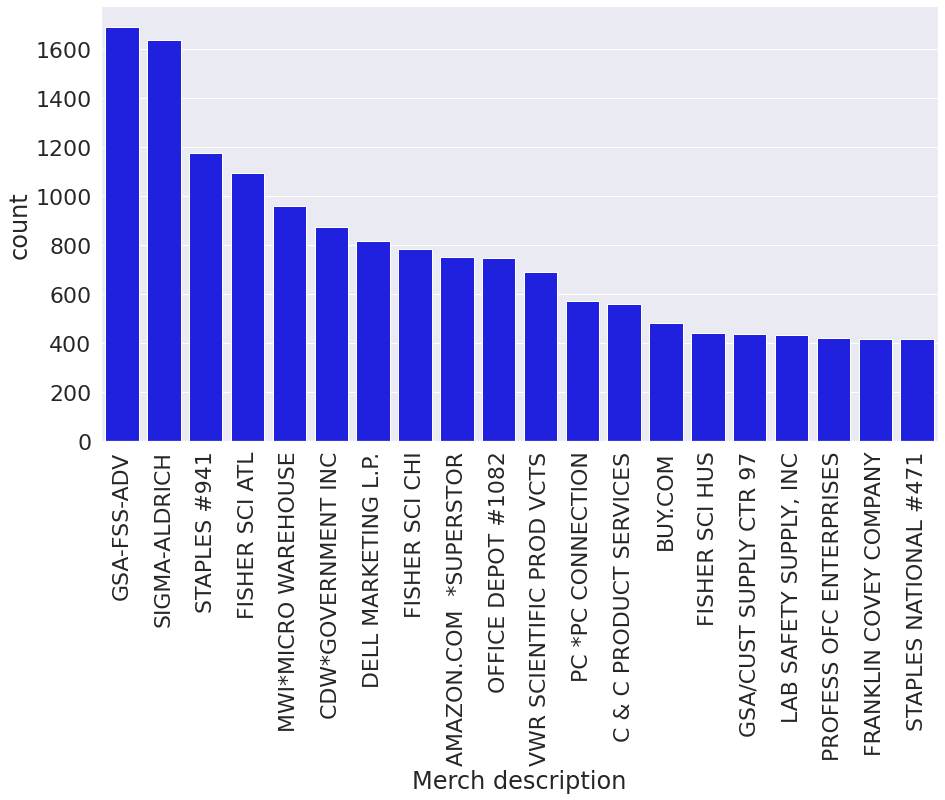

In [68]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Merch description', data = mydata, color="blue", order =mydata['Merch description'].value_counts().head(20).index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_yscale('log')

### Merch state
State the merchant is located in.

Number of records.

In [39]:
mydata['Merch state'].count()

95558

Percent Populated.

In [40]:
mydata['Merch state'].count() * 100 / numrecords

98.76489617892985

Unique Values

In [41]:
len(mydata['Merch state'].unique())

228

Most common field.

In [42]:
mydata['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
060        1
654        1
779        1
296        1
879        1
Name: Merch state, Length: 227, dtype: int64

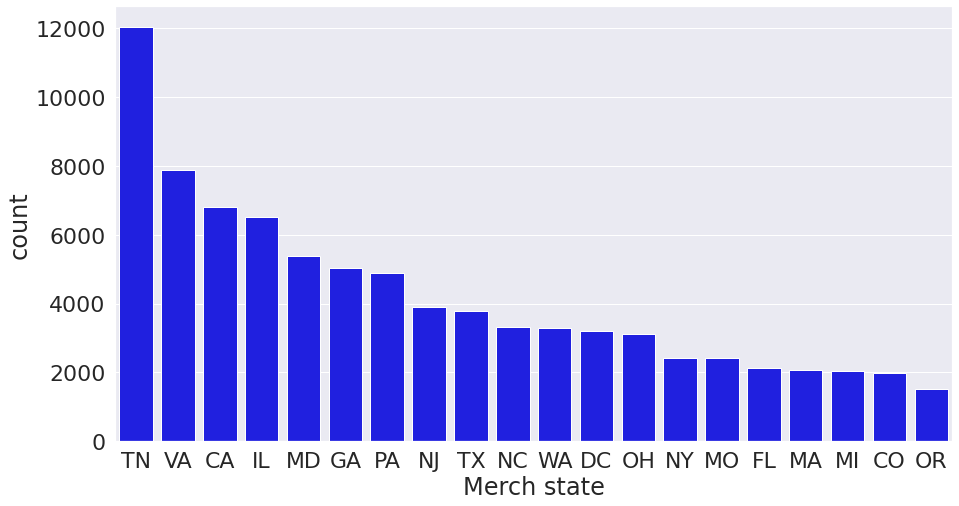

In [73]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Merch state', data = mydata, color="blue", order =mydata['Merch state'].value_counts().head(20).index)
#plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.set_yscale('log')

### Merch zip
Zip code the merchant is located in.

Number of records.

In [47]:
mydata['Merch zip'].count()

92097

Percent Populated.

In [48]:
mydata['Merch zip'].count() * 100 / numrecords

95.1877461163995

Unique Values

In [49]:
len(mydata['Merch zip'].unique())

4568

Most common field.

In [50]:
mydata['Merch zip'].value_counts()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
           ...  
52806.0        1
60466.0        1
77338.0        1
44039.0        1
34218.0        1
Name: Merch zip, Length: 4567, dtype: int64

[Text(0, 0.5, 'Log Scale of Count')]

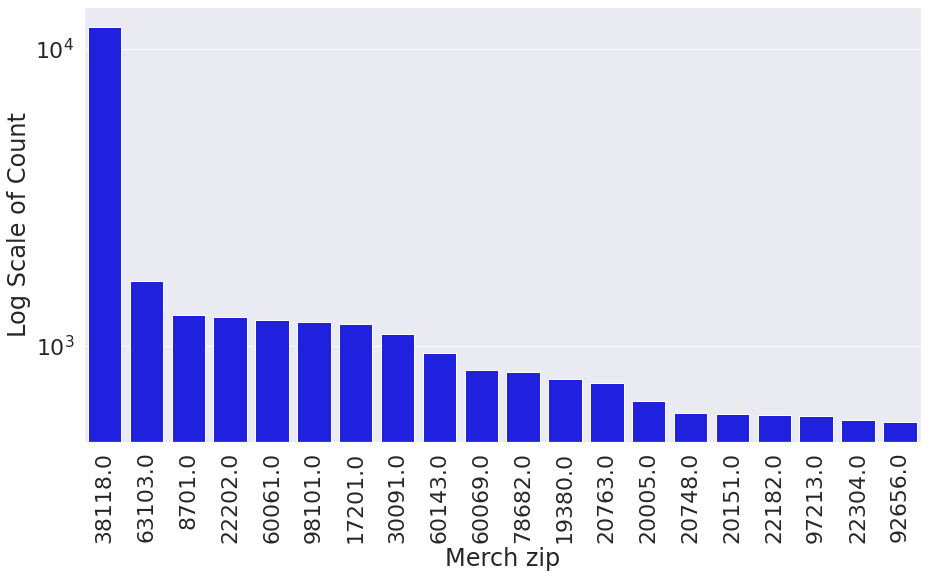

In [86]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Merch zip', data = mydata, color="blue", order =mydata['Merch zip'].value_counts().head(20).index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_yscale('log')
plot.set(ylabel='Log Scale of Count')

### Transtype
Transaction Type.

Number of records.

In [51]:
mydata['Transtype'].count()

96753

Percent Populated.

In [52]:
mydata['Transtype'].count() * 100 / numrecords

100.0

Unique Values

In [53]:
len(mydata['Transtype'].unique())

4

Most common field.

In [54]:
mydata['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

[Text(0, 0.5, 'Log Scale of Count')]

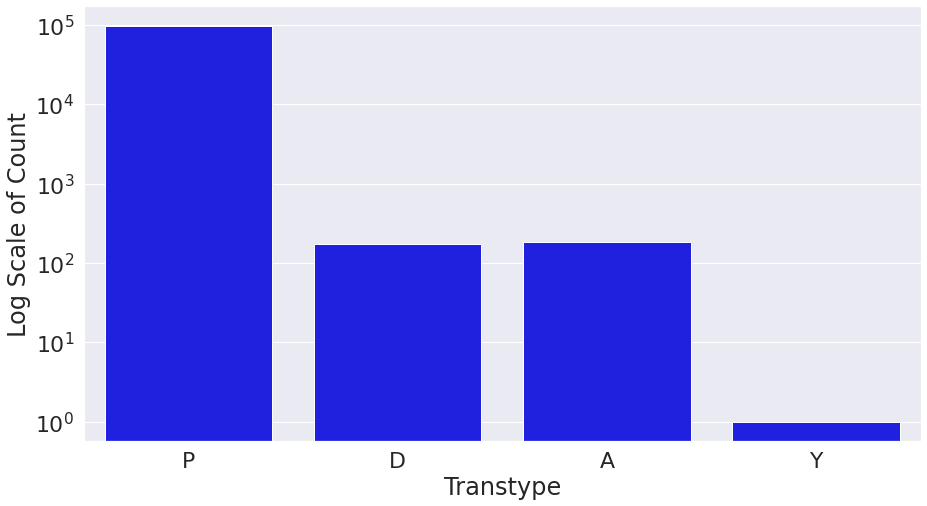

In [87]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Transtype', data = mydata, color="blue")
plot.set_yscale('log')
plot.set(ylabel='Log Scale of Count')

### Amount
Amount of the transaction.

Number of records.

In [59]:
mydata['Amount'].count()

96753

Percent Populated.

In [60]:
mydata['Amount'].count() * 100 / numrecords

100.0

Unique Values

In [61]:
len(mydata['Amount'].unique())

34909

Most common field.

In [63]:
mydata['Amount'].describe()

count    9.675300e+04
mean     4.278857e+02
std      1.000614e+04
min      1.000000e-02
25%      3.348000e+01
50%      1.379800e+02
75%      4.282000e+02
max      3.102046e+06
Name: Amount, dtype: float64

Number of Zeros

In [64]:
len(mydata[mydata['Amount'] == 0])

0

[Text(0, 0.5, 'Log Scale of Count')]

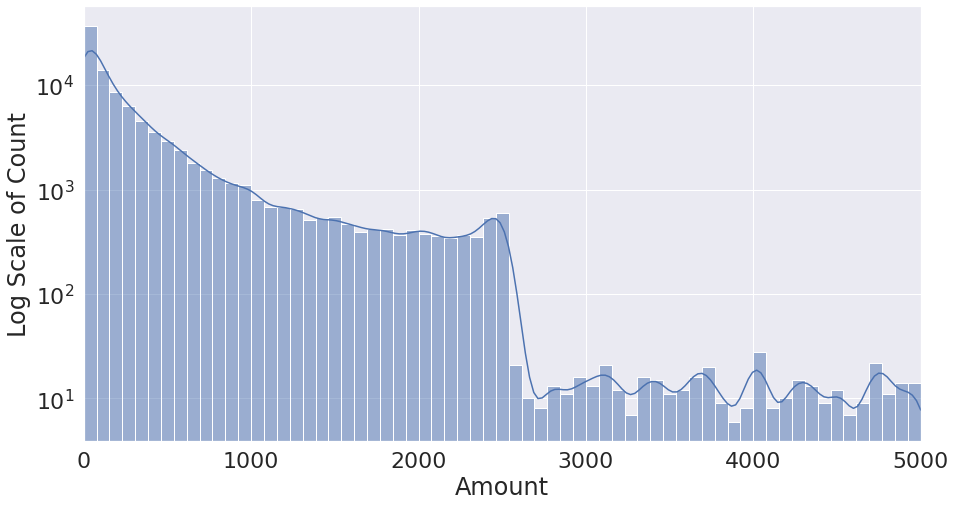

In [107]:
xhigh = 5000
plt.xlim(0,xhigh)
temp = mydata[mydata['Amount'] <= xhigh]
plot = sns.histplot(temp['Amount'],bins=65, kde=True)
plot.set_yscale('log')
plot.set(ylabel='Log Scale of Count')

In [108]:
1 - (len(mydata[mydata['Amount'] > xhigh]) / mydata["Amount"].count())

0.9967546225956818

### Fraud
Fraud label.

Number of records.

In [55]:
mydata['Fraud'].count()

96753

Percent Populated.

In [56]:
mydata['Fraud'].count() * 100 / numrecords

100.0

Unique Values

In [57]:
len(mydata['Fraud'].unique())

2

Most common field.

In [58]:
mydata['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

[Text(0, 0.5, 'Log Scale of Count')]

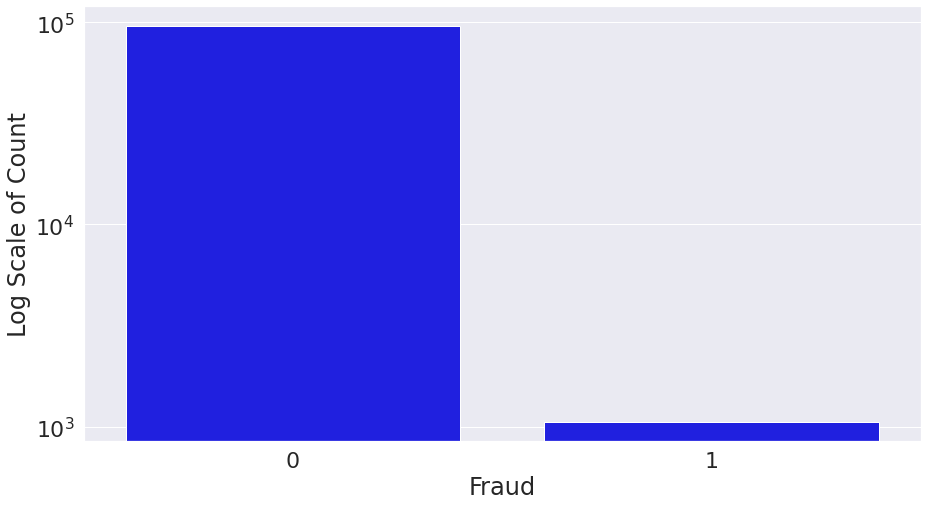

In [88]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Fraud', data = mydata, color="blue")
plot.set_yscale('log')
plot.set(ylabel='Log Scale of Count')

In [144]:
mydata[mydata['Merchnum']=='0']

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
509,510,5142268992,2010-01-05,0,CHARLESTON CO PARKING OP0,819,NaN,A,200.00,0
817,818,5142230669,2010-01-06,0,TOMMY'S TRAILERS,OK,NaN,P,48.97,0
1221,1222,5142231496,2010-01-07,0,TOMMY'S TRAILERS,OK,NaN,P,87.02,0
1402,1403,5142159706,2010-01-07,0,INTERACTIVE SOFTWARE S,NaN,NaN,P,460.00,0
2089,2090,5142243966,2010-01-11,0,ESTUARINE RESEARCH FDRTN,MD,20676.0,P,25.00,0
...,...,...,...,...,...,...,...,...,...,...
95757,95758,5142127276,2010-12-23,0,NATIONAL GEOGRAPHIC INC 0,052,NaN,A,2225.00,0
96273,96274,5142167414,2010-12-29,0,METRO MEDIA NEWS MONITOR0,586,NaN,A,46.59,0
96384,96385,5142231496,2010-12-29,0,TOMMY'S TRAILERS,OK,NaN,P,539.90,0
96394,96395,5142127276,2010-12-29,0,DISCOVERY COMMUNICATIONS0,288,NaN,A,2338.60,0
